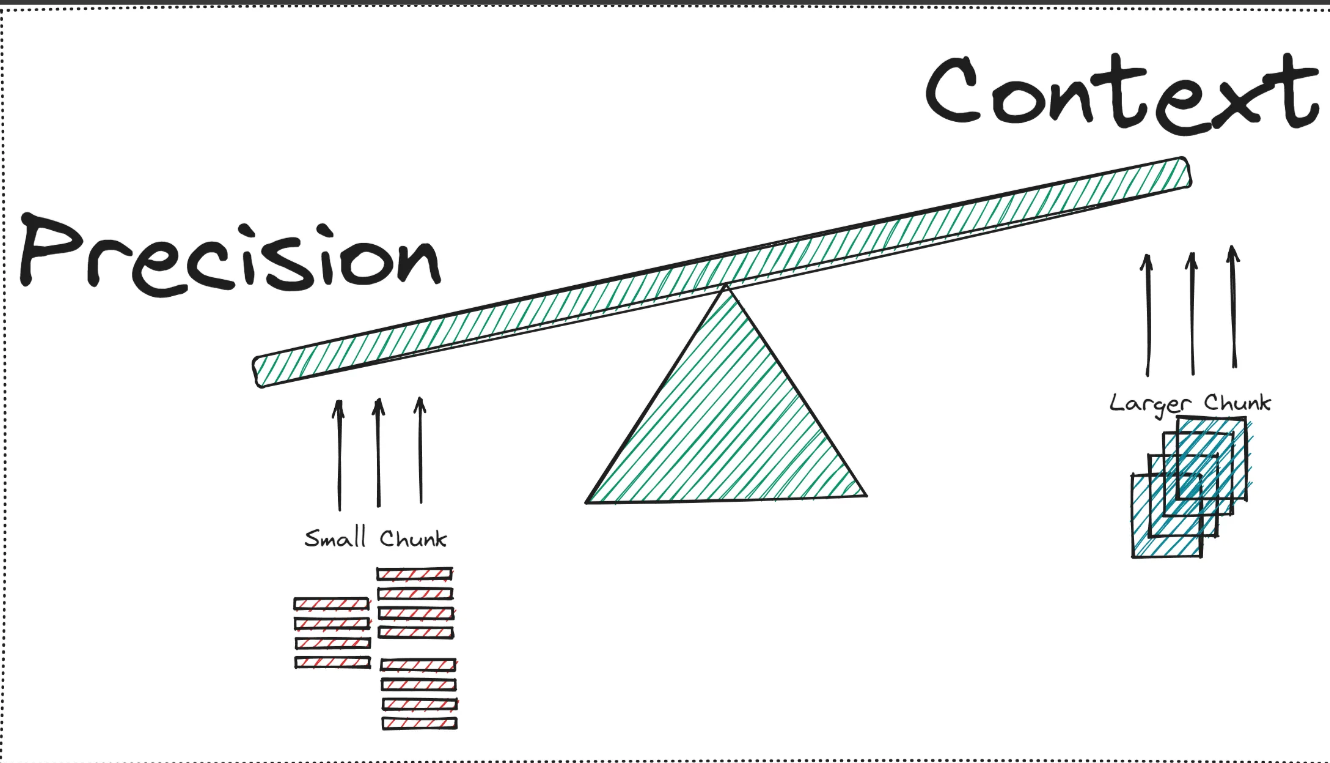

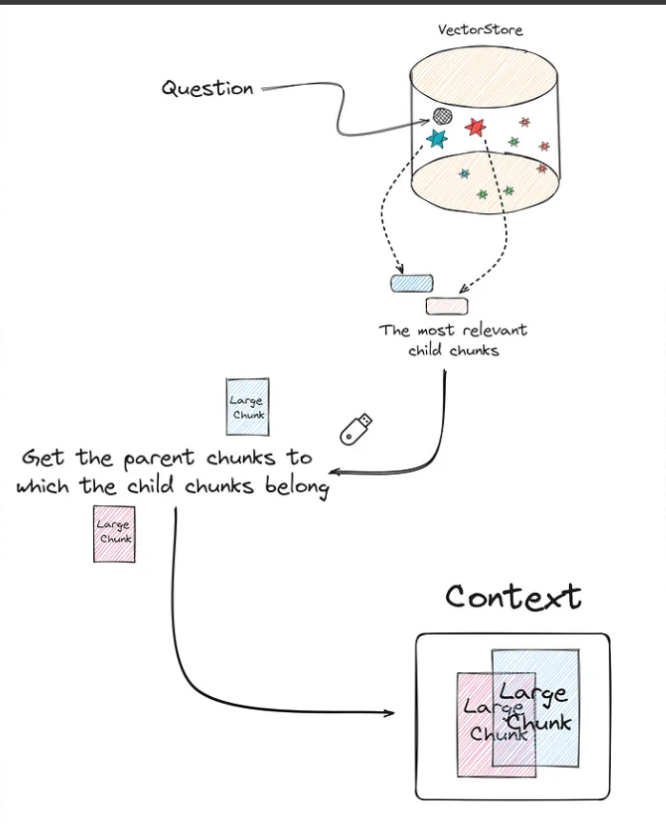

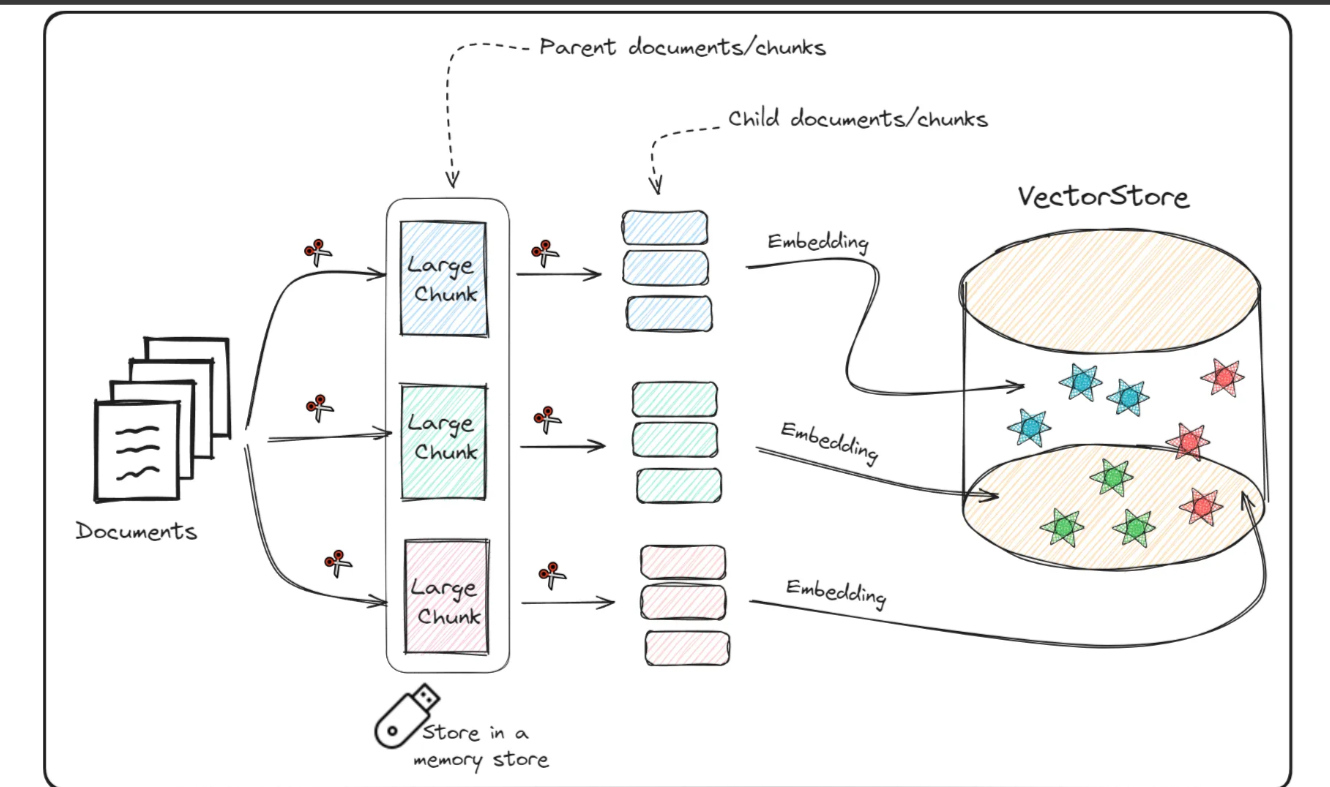

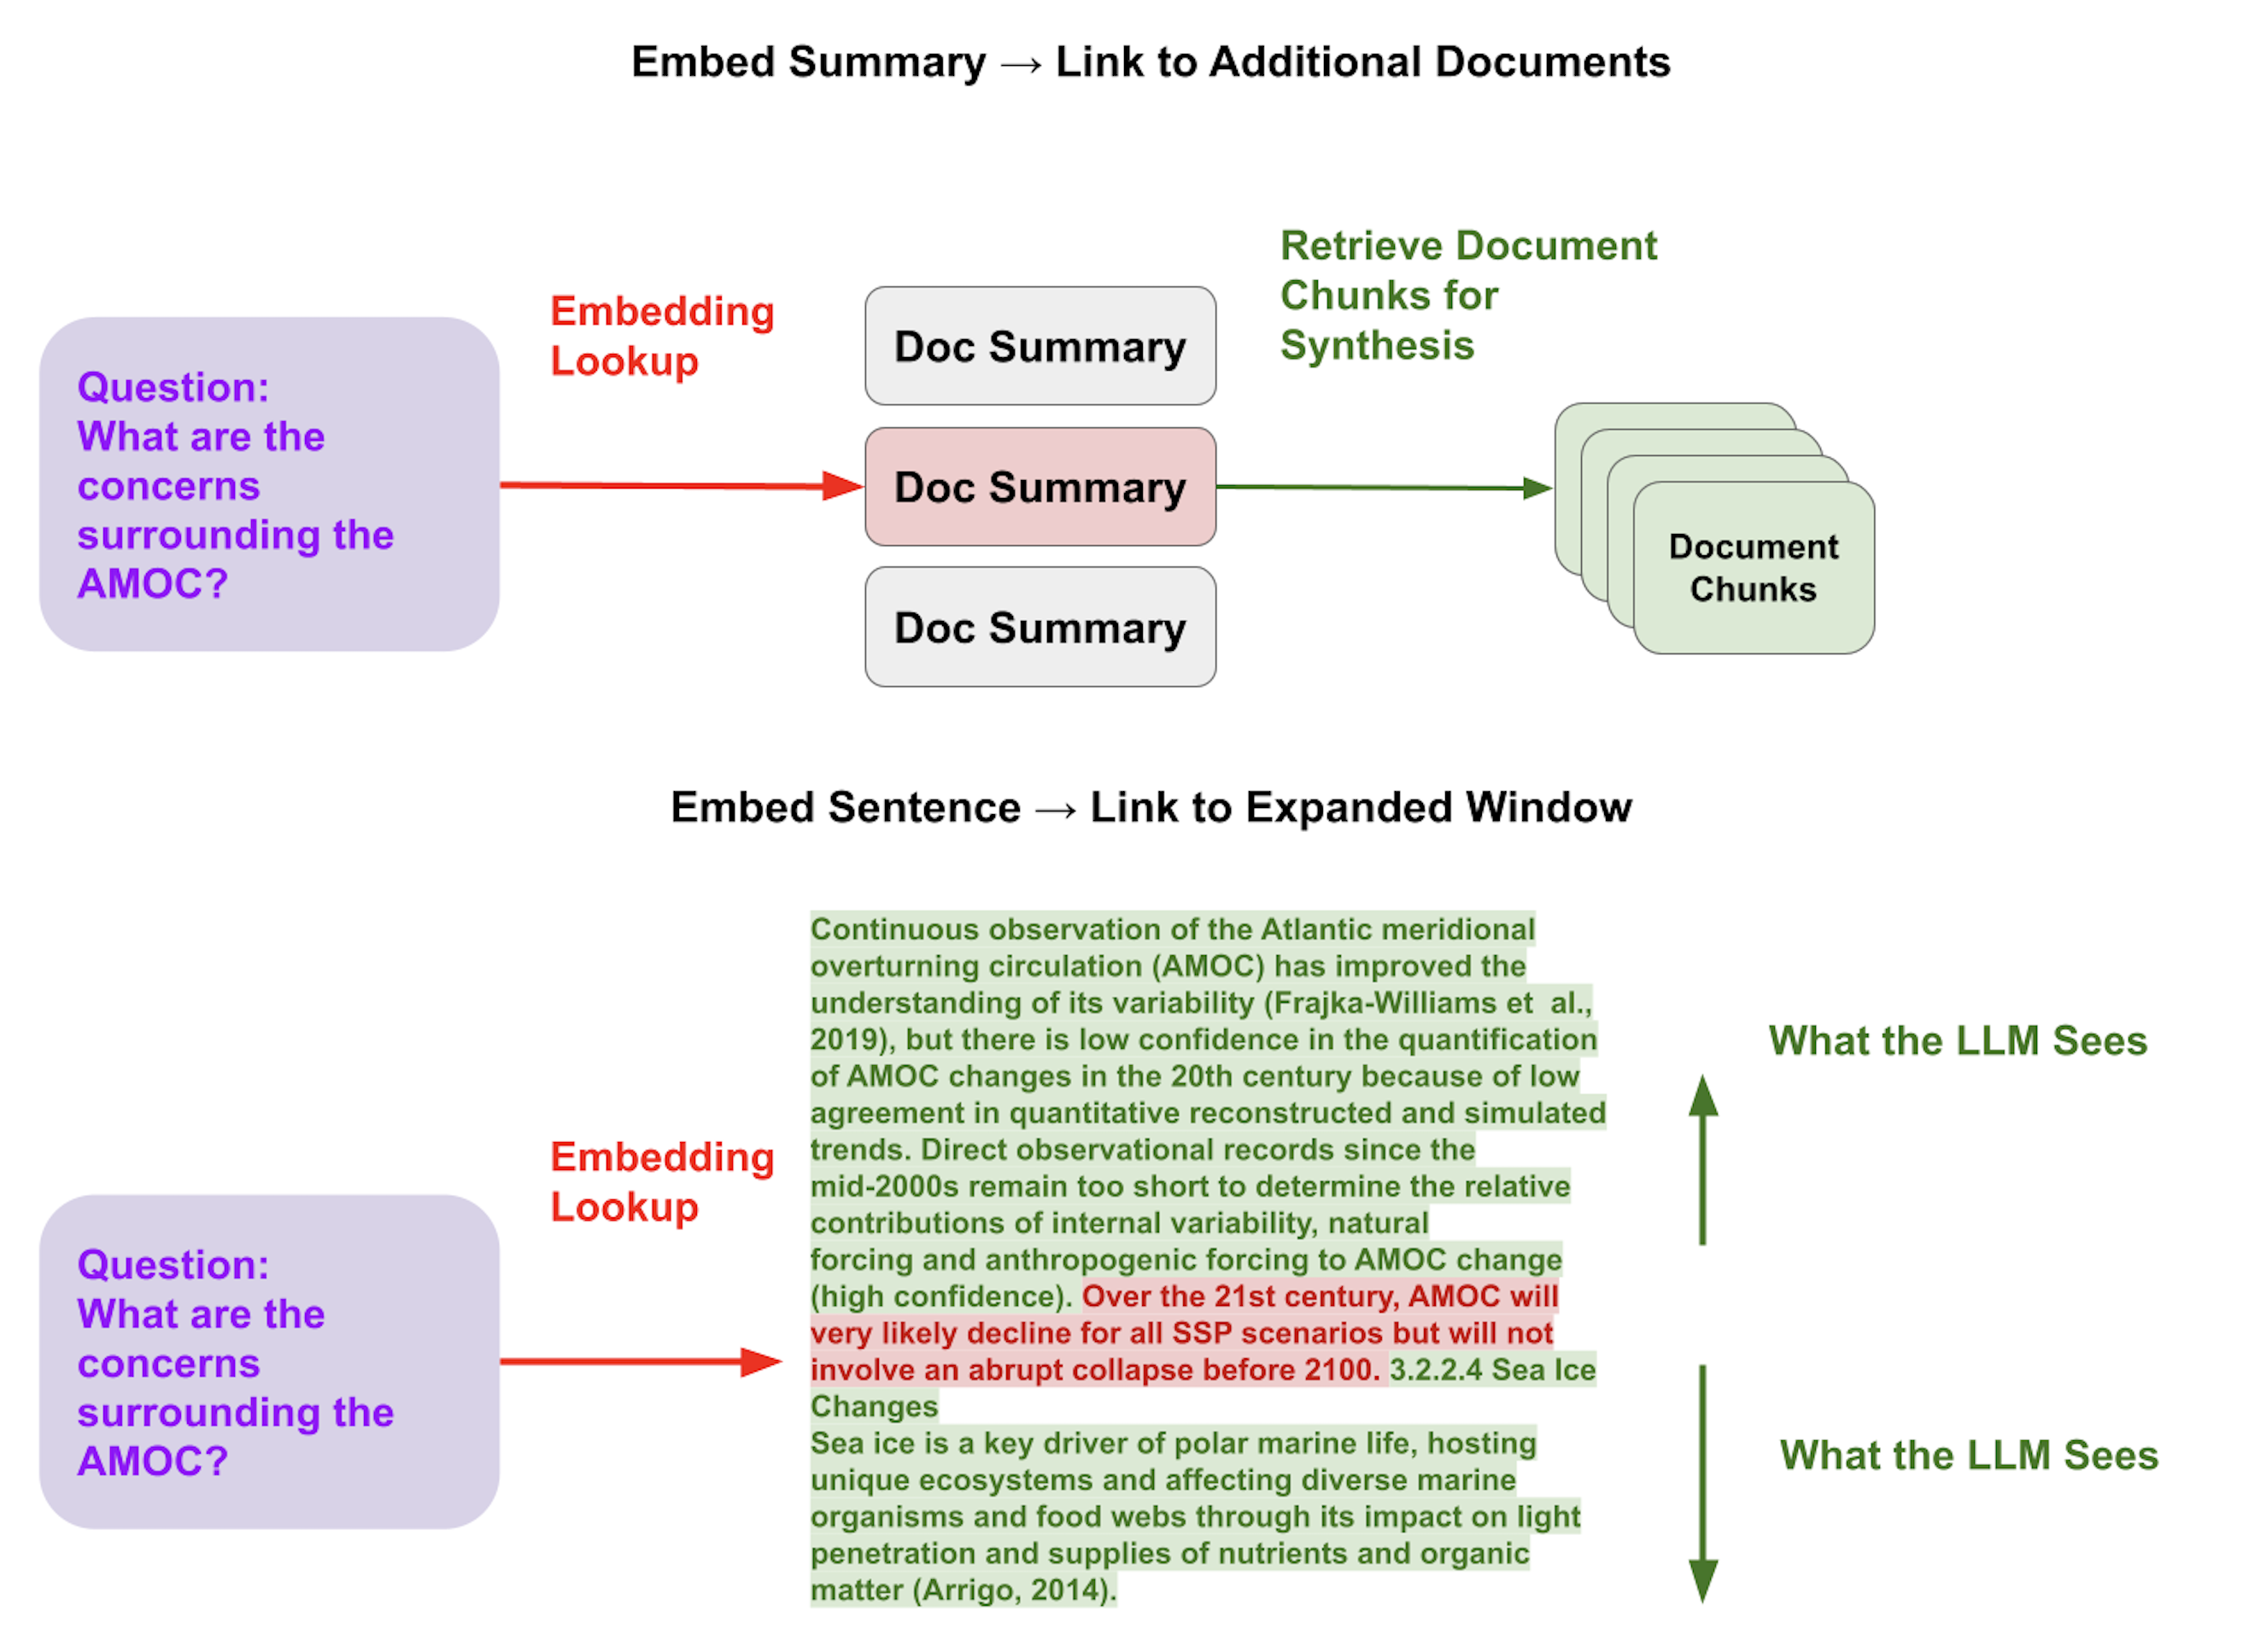

In [ ]:
! pip install -qU langchain-community faiss-cpu langchain-chroma langchain langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 67.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.6 MB/s eta 0:00:00

In [ ]:
from google.colab import userdata
import os

openai_api_key = userdata.get('openai_api_key')

os.environ["OPENAI_API_KEY"] = openai_api_key

In [ ]:
from langchain.storage import InMemoryByteStore
from langchain_chroma import Chroma
from langchain_community.document_loaders import TextLoader
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

loaders = [
    TextLoader("paul_graham_essay.txt"),
    TextLoader("state_of_the_union.txt"),
]
docs = []
for loader in loaders:
    docs.extend(loader.load())
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000)
docs = text_splitter.split_documents(docs)

# The vectorstore to use to index the child chunks
vectorstore = Chroma(
    collection_name="full_documents", embedding_function=OpenAIEmbeddings()
)

In [ ]:
len(docs)

12

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever

# The storage layer for the parent documents
store = InMemoryByteStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    byte_store=store,
    id_key=id_key,
)

doc_ids = [str(uuid.uuid4()) for _ in docs]

In [ ]:
len(docs)

12

In [ ]:
len(doc_ids)

12

In [ ]:
child_text_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

sub_docs = []
for i, doc in enumerate(docs):
  print(i)
  print(doc)
  break

0
page_content='What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.

The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.

The language we used was an early version of Fortran. You had to type programs on punch cards, then s

In [ ]:
child_text_splitter = RecursiveCharacterTextSplitter(chunk_size=400)

sub_docs = []
for i, doc in enumerate(docs):
    _id = doc_ids[i]
    _sub_docs = child_text_splitter.split_documents([doc])
    for _doc in _sub_docs:
        _doc.metadata[id_key] = _id
    sub_docs.extend(_sub_docs)
    # break

In [ ]:
10000/400

25.0

In [ ]:
len(sub_docs)

489

In [ ]:
_id == doc_ids[-1]

True

In [ ]:
sub_docs[0]

Document(metadata={'source': 'paul_graham_essay.txt', 'doc_id': '93330f7c-4b52-4aa6-a3a0-fca87d69eab1'}, page_content="What I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.")

In [ ]:
doc_ids[0]

'93330f7c-4b52-4aa6-a3a0-fca87d69eab1'

In [ ]:
docs[0]

In [ ]:
sub_docs[-1]

Document(metadata={'source': 'state_of_the_union.txt', 'doc_id': '11f5c70e-2232-4c91-b48e-159fc6ce4fa7'}, page_content='We are stronger today than we were a year ago. \n\nAnd we will be stronger a year from now than we are today. \n\nNow is our moment to meet and overcome the challenges of our time. \n\nAnd we will, as one people. \n\nOne America. \n\nThe United States of America. \n\nMay God bless you all. May God protect our troops.')

In [ ]:
list(zip(doc_ids, docs))[0]

('624c7cb1-ca82-414f-b492-3437f90e2a4d',
 Document(metadata={'source': 'paul_graham_essay.txt'}, page_content='What I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn\'t write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.\n\nThe first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district\'s 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain\'s lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights

In [ ]:
retriever.vectorstore.add_documents(sub_docs)
retriever.docstore.mset(list(zip(doc_ids, docs)))

In [ ]:
list(zip(doc_ids, docs))[0]

In [ ]:
retriever.vectorstore.similarity_search("justice breyer")[0]




Document(id='c0584f09-e66c-4e7e-b6fd-6d4980f3dc6f', metadata={'doc_id': 'e7d35fbd-ff75-42c2-8a5e-e00ea7d10091', 'source': 'state_of_the_union.txt'}, page_content='Tonight, I’d like to honor someone who has dedicated his life to serve this country: Justice Stephen Breyer—an Army veteran, Constitutional scholar, and retiring Justice of the United States Supreme Court. Justice Breyer, thank you for your service. \n\nOne of the most serious constitutional responsibilities a President has is nominating someone to serve on the United States Supreme Court.')

In [ ]:
retriever.invoke("justice breyer")[0]


Document(metadata={'source': 'state_of_the_union.txt'}, page_content='But in my administration, the watchdogs have been welcomed back. \n\nWe’re going after the criminals who stole billions in relief money meant for small businesses and millions of Americans.  \n\nAnd tonight, I’m announcing that the Justice Department will name a chief prosecutor for pandemic fraud. \n\nBy the end of this year, the deficit will be down to less than half what it was before I took office.  \n\nThe only president ever to cut the deficit by more than one trillion dollars in a single year. \n\nLowering your costs also means demanding more competition. \n\nI’m a capitalist, but capitalism without competition isn’t capitalism. \n\nIt’s exploitation—and it drives up prices. \n\nWhen corporations don’t have to compete, their profits go up, your prices go up, and small businesses and family farmers and ranchers go under. \n\nWe see it happening with ocean carriers moving goods in and out of America. \n\nDuring 

In [ ]:
import os


from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
## LLMChain

chain = prompt | llm

In [ ]:
from langchain_core.prompts import PromptTemplate
# from langchain.chains import LLMChain
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate(
input_variables=["text"],
template="""You are a helpful assistant responsible for generating a comprehensive summary of the text provided below.
text is: {text}"""
)

chain = prompt | llm | StrOutputParser()

text = """What I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn\'t write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.\n\nThe first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district\'s 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain\'s lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.\n\nThe language we used was an early version of Fortran. You had to type programs on punch cards, then stack them in the card reader and press a button to load the program into memory and run it. The result would ordinarily be to print something on the spectacularly loud printer.\n\nI was puzzled by the 1401. I couldn\'t figure out what to do with it. And in retrospect there\'s not much I could have done with it. The only form of input to programs was data stored on punched cards, and I didn\'t have any data stored on punched cards. The only other option was to do things that didn\'t rely on any input, like calculate approximations of pi, but I didn\'t know enough math to do anything interesting of that type. So I\'m not surprised I can\'t remember any programs I wrote, because they can\'t have done much. My clearest memory is of the moment I learned it was possible for programs not to terminate, when one of mine didn\'t. On a machine without time-sharing, this was a social as well as a technical error, as the data center manager\'s expression made clear.\n\nWith microcomputers, everything changed. Now you could have a computer sitting right in front of you, on a desk, that could respond to your keystrokes as it was running instead of just churning through a stack of punch cards and then stopping. [1]\n\nThe first of my friends to get a microcomputer built it himself. It was sold as a kit by Heathkit. I remember vividly how impressed and envious I felt watching him sitting in front of it, typing programs right into the computer.\n\nComputers were expensive in those days and it took me years of nagging before I convinced my father to buy one, a TRS-80, in about 1980. The gold standard then was the Apple II, but a TRS-80 was good enough. This was when I really started programming. I wrote simple games, a program to predict how high my model rockets would fly, and a word processor that my father used to write at least one book. There was only room in memory for about 2 pages of text, so he\'d write 2 pages at a time and then print them out, but it was a lot better than a typewriter.\n\nThough I liked programming, I didn\'t plan to study it in college. In college I was going to study philosophy, which sounded much more powerful. It seemed, to my naive high school self, to be the study of the ultimate truths, compared to which the things studied in other fields would be mere domain knowledge. What I discovered when I got to college was that the other fields took up so much of the space of ideas that there wasn\'t much left for these supposed ultimate truths. All that seemed left for philosophy were edge cases that people in other fields felt could safely be ignored.\n\nI couldn\'t have put this into words when I was 18. All I knew at the time was that I kept taking philosophy cou"""
summary = chain.invoke({'text':text})
print(summary)

In February 2021, an individual reflects on their early experiences with writing and programming before attending college. They began writing short stories in their youth without much plot but with emotionally strong characters, which they later deemed as lacking depth.

Their introduction to programming started in 9th grade using an IBM 1401 at their junior high school. They were fascinated yet perplexed by this machine, which required programming on punch cards. The limitations of the 1401, such as its inability to handle real-time input, restricted their programming endeavors, resulting in unmemorable projects, aside from the notable experience of accidentally creating a program that didn't terminate.

The advent of microcomputers revolutionized their programming experiences. A friend's self-built microcomputer sparked both admiration and jealousy. After persistent persuasion, they acquired a TRS-80 in about 1980, which marked the beginning of their serious programming journey. They

In [ ]:
len(summary)

1501

In [ ]:
len(text)

3679

In [ ]:
# prompt = ChatPromptTemplate
# chain = prompt | llm | StrOutputParser()

In [ ]:
import uuid

from langchain_core.documents import Document
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

chain = (
    {"text": lambda x: x.page_content}
    | ChatPromptTemplate.from_template("Summarize the following document:\n\n{text}")
    | llm
    | StrOutputParser()
)

In [ ]:
summaries = chain.batch(docs, {"max_concurrency": 5})

In [ ]:
result = [chain.invoke(doc)for doc in docs]

In [ ]:
len(summaries)

12

In [ ]:
len(result)

12

In [ ]:
# The vectorstore to use to index the child chunks
from langchain.retrievers.multi_vector import MultiVectorRetriever

vectorstore = Chroma(collection_name="summaries", embedding_function=OpenAIEmbeddings())
# The storage layer for the parent documents
store = InMemoryByteStore()
id_key = "doc_id"
# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    byte_store=store,
    id_key=id_key,
)
doc_ids = [str(uuid.uuid4()) for _ in docs]

summary_docs = [
    Document(page_content=s, metadata={id_key: doc_ids[i]})
    for i, s in enumerate(summaries)
]

retriever.vectorstore.add_documents(summary_docs)
retriever.docstore.mset(list(zip(doc_ids, docs)))

NameError: name 'Document' is not defined

Document(metadata={'source': 'paul_graham_essay.txt'}, page_content='What I Worked On\n\nFebruary 2021\n\nBefore college the two main things I worked on, outside of school, were writing and programming. I didn\'t write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.\n\nThe first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district\'s 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain\'s lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.\n\nThe language we used was an early ver

In [ ]:
sub_docs = retriever.vectorstore.similarity_search("justice breyer")

sub_docs[0]

In [ ]:
retrieved_docs = retriever.invoke("justice breyer")

len(retrieved_docs[0].page_content)

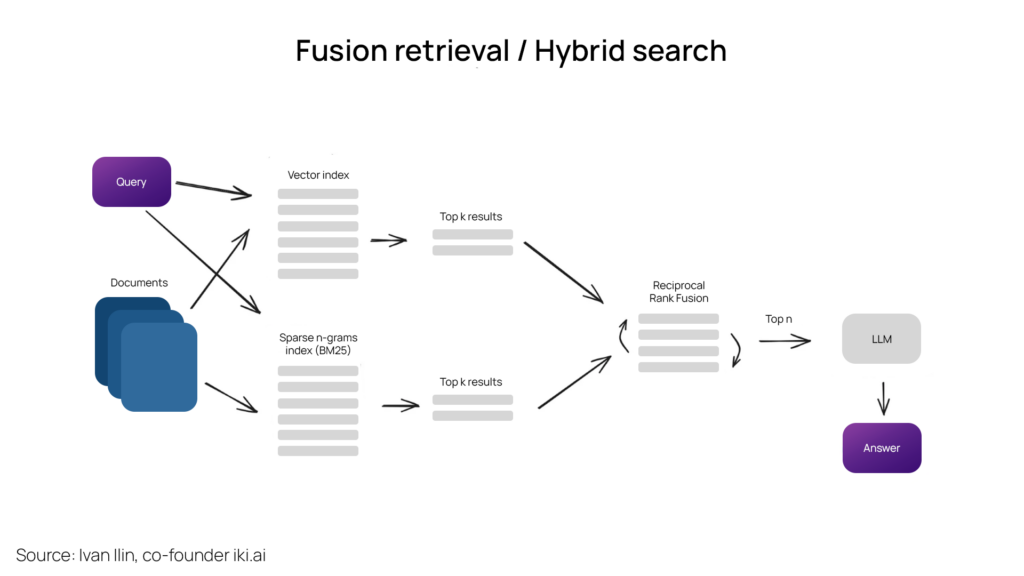

In [ ]:
import pickle
docstore = retriever.docstore
with open(os.path.join('.', "docstore"), "wb") as file:
    pickle.dump(docstore, file, pickle.HIGHEST_PROTOCOL)

In [ ]:
from langchain.vectorstores import FAISS
K_MULTIVECTOR = 2
import pickle
from langchain_community.retrievers import TFIDFRetriever
from langchain.retrievers import EnsembleRetriever

In [ ]:
K_TFIDF = 2
def create_and_save_tf_idf_retriever(data, tf_idf_save_dir):

    tfidf_retriever = TFIDFRetriever.from_documents(data, k=K_TFIDF)
    tfidf_retriever.save_local(tf_idf_save_dir)

    return tfidf_retriever

tfidf_retriever = create_and_save_tf_idf_retriever(docs, '.')

In [ ]:
result = tfidf_retriever.invoke('justice breyer')

In [ ]:
from langchain.retrievers import EnsembleRetriever
ensemble_retriever = EnsembleRetriever(retrievers=[retriever, tfidf_retriever], weights=[0.5, 0.5])

In [ ]:



# def create_and_save_MultiVectorRetriever(faiss_db_dir, parent_docs, child_docs, doc_ids, doc_save_dir):

#     # vectorstore = Chroma(
#     #     collection_name="full_documents", embedding_function=OpenAIEmbeddings(), persist_directory=persist_directory,
#     # )

#     embedding = OpenAIEmbeddings()
#     texts = ["FAISS is an important library", "LangChain supports FAISS"]
#     faiss = FAISS.from_texts(texts, embedding)


#     store = InMemoryByteStore()

#     retriever = MultiVectorRetriever(
#         vectorstore=faiss,
#         byte_store=store,
#         id_key=id_key,
#     )

#     MAX_BATCH_SIZE = 150
#     for i in range(0, len(child_docs), MAX_BATCH_SIZE):
#         batch = child_docs[i : i + MAX_BATCH_SIZE]
#         print(len(batch))
#         retriever.vectorstore.add_documents(batch)

#     retriever.search_kwargs["k"] = K_MULTIVECTOR

#     retriever.docstore.mset(list(zip(doc_ids, parent_docs)))
#     print("docstore")
#     docstore = retriever.docstore

#     vectorstore = retriever.vectorstore
#     vectorstore.save_local(os.path.join(faiss_db_dir, "faiss_index"))

#     with open(os.path.join(doc_save_dir, "docstore"), "wb") as file:
#         pickle.dump(docstore, file, pickle.HIGHEST_PROTOCOL)

#     return retriever

In [ ]:
# def load_MultiVectorRetriever(faiss_db_dir, doc_load_dir):

#     with open(os.path.join(doc_load_dir, "docstore"), "rb") as file:
#         loaded_docstore = pickle.load(file)

#     embedding = OpenAIEmbeddings()
#     loaded_vectorstore = FAISS.load_local(
#                         os.path.join(faiss_db_dir, "faiss_index"),
#                         embedding, allow_dangerous_deserialization=True)

#     # loaded_vectorstore = Chroma(
#     # collection_name="full_documents", embedding_function=OpenAIEmbeddings(), persist_directory=persist_directory,
#     # )

#     # store = InMemoryByteStore()
#     loaded_retriever = MultiVectorRetriever(
#     vectorstore=loaded_vectorstore,
#     id_key=id_key,
#     docstore=loaded_docstore,
#     )
#     loaded_retriever.search_kwargs["k"] = K_MULTIVECTOR
#     return loaded_retriever


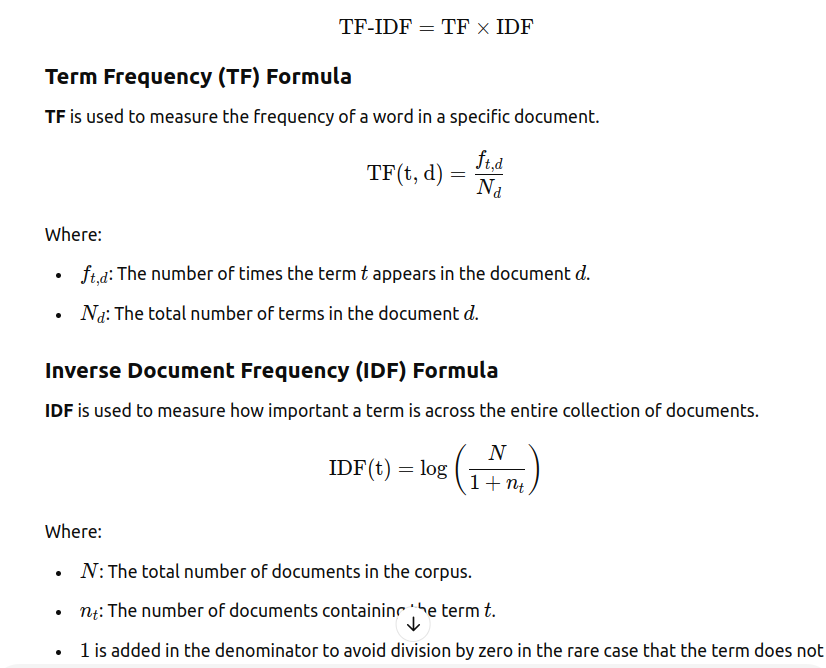

In [ ]:
def load_tf_idf_retriever(tf_idf_load_dir):
    # tf_idf = TFIDFRetriever(k=2)
    tf_idf_retriever = TFIDFRetriever.load_local(tf_idf_load_dir, allow_dangerous_deserialization=True)
    return tf_idf_retriever


In [ ]:
def create_ensemble_retriever(retriever1, retriever2):
    ensemble_retriever = EnsembleRetriever(retrievers=[retriever1, retriever2], weights=[0.8, 0.2])
    return ensemble_retriever

In [ ]:
parent_docs, child_docs, doc_ids = read_data_create_documents(source, sheet_names)
multivector_retriever = create_and_save_MultiVectorRetriever(faiss_db_dir, parent_docs, child_docs, doc_ids, doc_dir)
multivector_retriever.search_kwargs['k'] = K_MULTIVECTOR
tf_idf_retriever = create_and_save_tf_idf_retriever(parent_docs, tf_idf_dir)
tf_idf_retriever.k = K_TFIDF
retriever =  create_ensemble_retriever(multivector_retriever, tf_idf_retriever)

In [ ]:
from langchain_community.retrievers import TFIDFRetriever
K_TFIDF = 3
tfidf_retriever = TFIDFRetriever.from_documents(docs, k=K_TFIDF)
# tfidf_retriever.save_local(tf_idf_save_dir)

In [ ]:
len(result)

3

In [ ]:
result

[Document(metadata={'source': 'state_of_the_union.txt'}, page_content='But in my administration, the watchdogs have been welcomed back. \n\nWe’re going after the criminals who stole billions in relief money meant for small businesses and millions of Americans.  \n\nAnd tonight, I’m announcing that the Justice Department will name a chief prosecutor for pandemic fraud. \n\nBy the end of this year, the deficit will be down to less than half what it was before I took office.  \n\nThe only president ever to cut the deficit by more than one trillion dollars in a single year. \n\nLowering your costs also means demanding more competition. \n\nI’m a capitalist, but capitalism without competition isn’t capitalism. \n\nIt’s exploitation—and it drives up prices. \n\nWhen corporations don’t have to compete, their profits go up, your prices go up, and small businesses and family farmers and ranchers go under. \n\nWe see it happening with ocean carriers moving goods in and out of America. \n\nDuring

In [ ]:
result = ensemble_retriever.invoke('justice breyer')

In [ ]:
len(result)

4

In [ ]:
output = [doc.page_content for doc in result]

In [ ]:
len(list(set(output)))

4

# TF-IDF Notebook for AI Class
# Author: Mahdi Beigzadeh

# Cell 1: Text cell - Introduction to TF-IDF
"""
# Understanding TF-IDF (Term Frequency-Inverse Document Frequency)
**TF-IDF** (Term Frequency-Inverse Document Frequency) is a statistical measure used in Natural Language Processing (NLP) and Information Retrieval (IR) to evaluate the importance of a word in a document relative to a collection of documents (corpus).

Unlike simple word frequency, TF-IDF balances common and rare words to highlight the most meaningful terms in a document.
"""

# Cell 2: Text cell - Explanation of TF and IDF
"""
## How TF-IDF Works?

TF-IDF combines two components: **Term Frequency (TF)** and **Inverse Document Frequency (IDF)**.

### Term Frequency (TF):
Measures how often a word appears in a document. A higher frequency suggests greater importance.
If a term appears frequently in a document, it is likely relevant to the document’s content.
Formula:  

$$ \text{TF}(t, d) = \frac{\text{Frequency of term t in document d}}{\text{Total number of terms in document d}} $$

### Limitations of TF Alone:
- TF does not account for the global importance of a term across the entire corpus.
- Common words like “the” or “and” may have high TF scores but are not meaningful in distinguishing documents.

---

### Inverse Document Frequency (IDF):
Reduces the weight of common words across multiple documents while increasing the weight of rare words. If a term appears in fewer documents, it is more likely to be meaningful and specific.

Formula:

$$ \text{IDF}(t, D) = \log \left( \frac{N}{\text{Number of documents containing term t}} \right) $$

Where:
- N is the total number of documents in the corpus.
- The logarithm helps dampen the effect of very large or very small values.

### Limitations of IDF Alone:
- IDF does not consider how often a term appears within a specific document.
- A term might be rare across the corpus (high IDF) but irrelevant in a specific document (low TF).
"""

# Cell 3: Text cell - Example Walkthrough
"""
### Converting Text into Vectors with TF-IDF

Let’s walk through a detailed example to understand how TF-IDF works. Suppose we have three documents in our corpus:

- Document 1: “The cat sat on the mat.”
- Document 2: “The dog played in the park.”
- Document 3: “Cats and dogs are great pets.”

Our goal is to calculate the **TF-IDF score** for the word "cat" in each of these documents.

#### Step 1: Calculate Term Frequency (TF)
For **Document 1**:
- The word "cat" appears 1 time.
- The total number of terms in Document 1 is 6.
- So, $$ \text{TF}(cat, Document 1) = \frac{1}{6} $$

For **Document 2**:
- The word "cat" does not appear.
- $$ \text{TF}(cat, Document 2) = 0 $$

For **Document 3**:
- The word "cat" appears 1 time (as "cats").
- The total number of terms in Document 3 is 6.
- $$ \text{TF}(cat, Document 3) = \frac{1}{6} $$

#### Step 2: Calculate Inverse Document Frequency (IDF)
- Total number of documents in the corpus = 3.
- Number of documents containing the term "cat" = 2 (Documents 1 and 3).
- $$ \text{IDF}(cat, D) = \log \left( \frac{3}{2} \right) \approx 0.176 $$

#### Step 3: Calculate TF-IDF
Now, the **TF-IDF score** for the term "cat" is calculated as:

$$ \text{TF-IDF}(cat, Document 1) = \text{TF}(cat, Document 1) \times \text{IDF}(cat, D) $$

In Document 1 and Document 3, "cat" has the same TF-IDF score, while in Document 2, the score is 0.
"""

# Cell 4: Code cell - Implementing TF-IDF in Python with Sklearn
# Importing necessary modules
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a corpus of documents
d0 = "The cat sat on the mat."
d1 = "The dog played in the park."
d2 = "Cats and dogs are great pets."
string = [d0, d1, d2]

# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit the model and transform the data
result = tfidf.fit_transform(string)

# Display IDF values of the words
print("\nIDF values:")
for term, idf_value in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(f"{term} : {idf_value}")

# Display the vocabulary (terms and corresponding indices)
print("\nWord Indexing:")
print(tfidf.vocabulary_)

# Display TF-IDF values in matrix form
print("\nTF-IDF values (Matrix Form):")
print(result.toarray())


# %% [markdown]
# ## Understanding TF-IDF (Term Frequency-Inverse Document Frequency)
#
# TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus).
#
# Unlike simple word frequency, TF-IDF balances common and rare words to highlight the most meaningful terms.
#
# ## How TF-IDF Works?
#
# TF-IDF combines two components: Term Frequency (TF) and Inverse Document Frequency (IDF).
#
# ### Term Frequency (TF)
# Measures how often a word appears in a document. A higher frequency suggests greater importance. If a term appears frequently in a document, it is likely relevant to the document’s content.
#
# Formula:
#
# \[
# TF = \frac{\text{Frequency of term in document}}{\text{Total number of terms in document}}
# \]
#
# ### Inverse Document Frequency (IDF)
# Reduces the weight of common words across multiple documents while increasing the weight of rare words. If a term appears in fewer documents, it is more likely to be meaningful and specific.
#
# Formula:
#
# \[
# IDF = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents containing the term}} \right)
# \]

# %% [markdown]
# ## Limitations of TF and IDF
#
# **Limitations of TF Alone:**
# - TF does not account for the global importance of a term across the entire corpus.
# - Common words like “the” or “and” may have high TF scores but are not meaningful in distinguishing documents.
#
# **Limitations of IDF Alone:**
# - IDF does not consider how often a term appears within a specific document.
# - A term might be rare across the corpus (high IDF) but irrelevant in a specific document (low TF).

# %% [markdown]
# ## Converting Text into Vectors with TF-IDF : Example
#
# Let’s walk through a detailed example with a corpus consisting of three documents:
#
# - Document 1: “The cat sat on the mat.”
# - Document 2: “The dog played in the park.”
# - Document 3: “Cats and dogs are great pets.”
#
# Our goal is to calculate the TF-IDF score for specific terms in these documents, focusing on the word "cat".

# %% [markdown]
# ### Step 1: Calculate Term Frequency (TF)
#
# **For Document 1:**
# - The word "cat" appears 1 time.
# - The total number of terms in Document 1 is 6 ("the", "cat", "sat", "on", "the", "mat").
# - So, **TF(cat, Document 1) = 1/6**.
#
# **For Document 2:**
# - The word "cat" does not appear.
# - So, **TF(cat, Document 2) = 0**.
#
# **For Document 3:**
# - The word "cat" appears 1 time (as "cats").
# - The total number of terms in Document 3 is 6 ("cats", "and", "dogs", "are", "great", "pets").
# - So, **TF(cat, Document 3) = 1/6**.

# %% [markdown]
# ### Step 2: Calculate Inverse Document Frequency (IDF)
#
# - Total number of documents in the corpus (D): 3
# - Number of documents containing the term "cat": 2 (Document 1 and Document 3).
# - So, **IDF(cat, D) = log(3/2) ≈ 0.176**.

# %% [markdown]
# ### Step 3: Calculate TF-IDF
#
# The TF-IDF score for "cat" is:
# - In Document 1 and Document 3: **0.029** (calculated by multiplying the TF and IDF scores).
# - In Document 2: **0** (because TF is 0).

# %% [markdown]
# ## Why is TF-IDF Useful in This Example?
#
# 1. **Identifying Important Terms:**
# - TF-IDF helps us understand that "cat" is somewhat important in Document 1 and Document 3 but irrelevant in Document 2.
#
# 2. **Filtering Common Words:**
# - Words like “the” or “and” would have high TF scores but very low IDF scores, indicating they are not meaningful.
#
# 3. **Highlighting Unique Terms:**
# - If a term like “mat” appeared only in Document 1, it would have a higher IDF score, making its TF-IDF score more significant in that document.

# %% [markdown]
# ## Implementing TF-IDF in Sklearn with Python
# In Python, TF-IDF values can be computed using `TfidfVectorizer()` method from the `sklearn.feature_extraction.text` module.

# %% [code]
# Import required module
from sklearn.feature_extraction.text import TfidfVectorizer

# Define documents
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'

# Create a corpus
corpus = [d0, d1, d2]

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Calculate tf-idf values
result = tfidf.fit_transform(corpus)

# Display idf values
print('\nidf values:')
for word, idf_value in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(f"{word} : {idf_value}")

# Display word indexes
print('\nWord indexes:')
print(tfidf.vocabulary_)

# Display tf-idf values
print('\ntf-idf value:')
print(result)

# Display tf-idf values in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())

# %% [markdown]
# ### Explanation of Output
#
# The `result` variable contains the TF-IDF values for the words in the corpus. Below is a table illustrating the computed TF-IDF values for the terms:
#
# | Document | Word | Document Index | Word Index | TF-IDF Value |
# |----------|------|----------------|------------|--------------|
# | d0       | for  | 0              | 0          | 0.549        |
# | d0       | geeks| 0              | 1          | 0.8355       |
# | d1       | geeks| 1              | 1          | 1.000        |
# | d2       | r2j  | 2              | 2          | 1.000        |

# %% [markdown]
# ## Complete Example Program

# %% [code]
# Complete program for computing TF-IDF values

from sklearn.feature_extraction.text import TfidfVectorizer

# Define documents
d0 = 'Geeks for geeks'
d1 = 'Geeks'
d2 = 'r2j'

# Create a corpus
corpus = [d0, d1, d2]

# Initialize TfidfVectorizer
tfidf = TfidfVectorizer()

# Calculate tf-idf values
result = tfidf.fit_transform(corpus)

# Display idf values
print('\nidf values:')
for word, idf_value in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(f"{word} : {idf_value}")

# Display word indexes
print('\nWord indexes:')
print(tfidf.vocabulary_)

# Display tf-idf values in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())

# %% [markdown]
# ## Conclusion
# - TF-IDF is a powerful technique for identifying important terms in a document relative to a corpus.
# - It helps us filter out common, non-informative words and highlight unique, meaningful terms.
